No presente projeto será realizado uma análise de dados com base no nível de obesidade de um grupo de pessoas. Os dados foram retirados do Kaggle.


In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
obesity_df = pd.read_csv('/content/obesity_data.csv')

In [4]:
obesity_df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [5]:
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [6]:
## Tratamento dos dados qualitativos

obesity_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
obesity_df['ObesityCategory'].unique()

array(['Normal weight', 'Obese', 'Overweight', 'Underweight'],
      dtype=object)

In [8]:
# Aplicação do método One Hot Encoding para a coluna Gender

obesity_df['Gender_Male'] = obesity_df['Gender'].apply(lambda Gender: 1 if Gender == 'Male' else 0)
obesity_df['Gender_Female'] = obesity_df['Gender'].apply(lambda Gender: 1 if Gender == 'Female' else 0)

In [9]:
obesity_df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory,Gender_Male,Gender_Female
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight,1,0
1,69,Male,164.127306,89.959256,33.395209,2,Obese,1,0
2,46,Female,168.072202,72.930629,25.817737,4,Overweight,0,1
3,32,Male,168.459633,84.886912,29.912247,3,Overweight,1,0
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight,1,0


In [10]:
obesity_clean = obesity_df.drop(columns=['Gender'])

In [11]:
obesity_clean.head()

,Age,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory,Gender_Male,Gender_Female
0,56,173.575262,71.982051,23.891783,4,Normal weight,1,0
1,69,164.127306,89.959256,33.395209,2,Obese,1,0
2,46,168.072202,72.930629,25.817737,4,Overweight,0,1
3,32,168.459633,84.886912,29.912247,3,Overweight,1,0
4,60,183.568568,69.038945,20.487903,3,Normal weight,1,0


In [12]:
## TREINO/TESTE
# Foi determinado um modelo de classificação para os dados apresentados

from sklearn.model_selection import train_test_split


In [13]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    obesity_clean.drop(['ObesityCategory'], axis=1),
    obesity_clean['ObesityCategory'],
    test_size=0.25,
    random_state=123
)

In [15]:
# Variáveis peditoras
predictors_train.head()

,Age,Height,Weight,BMI,PhysicalActivityLevel,Gender_Male,Gender_Female
894,74,162.159641,84.073330,31.972213,4,1,0
941,33,164.199720,65.230457,24.193884,4,1,0
285,19,164.100214,71.234948,26.452993,4,1,0
462,47,171.961675,106.336083,35.959805,1,0,1
370,22,153.693266,58.574677,24.797062,4,0,1


In [16]:
predictors_train.shape

(750, 7)

In [17]:
predictors_test.head()

,Age,Height,Weight,BMI,PhysicalActivityLevel,Gender_Male,Gender_Female
131,18,169.584299,64.800502,22.532381,3,0,1
203,56,185.236842,76.091278,22.175843,1,1,0
50,61,172.434957,86.770235,29.182342,2,0,1
585,67,162.377585,84.329132,31.983462,4,0,1
138,25,168.870082,81.131245,28.450029,2,0,1


In [18]:
predictors_test.shape

(250, 7)

In [19]:
# Variável resposta

target_train.head()

894            Obese
941    Normal weight
285       Overweight
462            Obese
370    Normal weight
Name: ObesityCategory, dtype: object

In [20]:
target_train.shape

(750,)

In [21]:
target_test.head()

131    Normal weight
203    Normal weight
50        Overweight
585            Obese
138       Overweight
Name: ObesityCategory, dtype: object

In [22]:
target_test.shape

(250,)

In [23]:
# Aplicação do modelo

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model = model.fit(predictors_train, target_train)

In [24]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel',
        'Gender_Male', 'Gender_Female'], dtype=object),
 'n_features_in_': 7,
 'n_outputs_': 1,
 'classes_': array(['Normal weight', 'Obese', 'Overweight', 'Underweight'],
       dtype=object),
 'n_classes_': 4,
 'max_features_': 7,
 'tree_': <sklearn.tree._tree.Tree at 0x7b9eaa5d1ae0>}

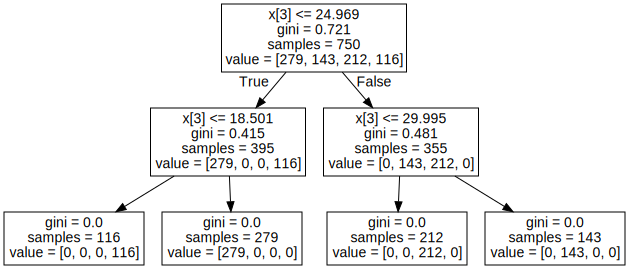

In [26]:
import graphviz
from sklearn import tree

tree_obesity = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_obesity)
graph

In [31]:
## AVALIAÇÃO
# Matriz Confusão
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Posição predição
target_predicted = model.predict(predictors_test)
target_predicted[0:5]

array(['Normal weight', 'Normal weight', 'Overweight', 'Obese',
       'Overweight'], dtype=object)

In [28]:
target_predicted.shape

(250,)

In [29]:
# Posição teste
target_test[0:5]

131    Normal weight
203    Normal weight
50        Overweight
585            Obese
138       Overweight
Name: ObesityCategory, dtype: object

In [30]:
target_test.shape

(250,)

In [32]:
confusion_matrix = confusion_matrix(target_test, target_predicted)
print(confusion_matrix)

[[91  0  1  0]
 [ 0 48  0  0]
 [ 0  0 83  0]
 [ 0  0  0 27]]


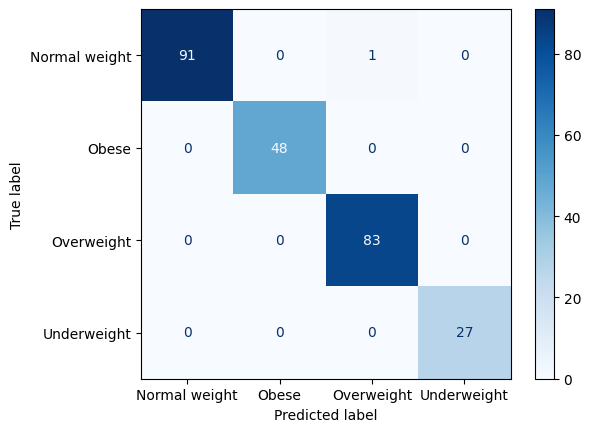

In [33]:
plot_confusion_matrix = ConfusionMatrixDisplay.from_estimator(model, predictors_test, target_test, cmap='Blues', values_format='.3g')
plot_confusion_matrix

In [34]:
# Acurácia

total = confusion_matrix.sum()
print(total)

250


In [35]:
acertos = np.diag(confusion_matrix).sum()
print(acertos)

249


In [36]:
acuracia = acertos/total
print(acuracia)

0.996


In [37]:
print(f'{round(100*acuracia,2)}%')

99.6%
